# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=38552f24750a25818b2e0d848e7eb0a5&units=imperial&q='

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

635

In [4]:
print(cities)

['abancay', 'ushuaia', 'sao filipe', 'tommot', 'punta arenas', 'balimo', 'castro', 'mataura', 'taolanaro', 'kashary', 'hilo', 'clyde river', 'san cristobal', 'busselton', 'yellowknife', 'cape town', 'carbonia', 'rikitea', 'lar', 'yulara', 'pevek', 'brookhaven', 'georgetown', 'pozo colorado', 'touba', 'barrow', 'gamba', 'cherskiy', 'puerto narino', 'marrakesh', 'alexandria', 'thompson', 'rumoi', 'turtas', 'attawapiskat', 'hasaki', 'swellendam', 'talnakh', 'bluff', 'velsk', 'nizhneyansk', 'albany', 'vila velha', 'hofn', 'vila', 'narsaq', 'codrington', 'gimli', 'lodja', 'hithadhoo', 'saint-philippe', 'jamestown', 'babstovo', 'petropavlovsk-kamchatskiy', 'atuona', 'hobart', 'toronto', 'faanui', 'kushima', 'saskylakh', 'dikson', 'fortuna', 'chulman', 'ushtobe', 'illoqqortoormiut', 'hirara', 'tuktoyaktuk', 'klaksvik', 'belle fourche', 'samarai', 'laguna', 'de aar', 'dingle', 'ust-nera', 'qaanaaq', 'kapaa', 'puerto ayora', 'new norfolk', 'union', 'kelso', 'bathsheba', 'half moon bay', 'chapai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities[0]

'abancay'

In [6]:
#find out keys by printing first city only
response1= query_url+cities[0]
data = requests.get(response1).json()
print(json.dumps(data, indent = 4, sort_keys= True))

{
    "base": "model",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -13.64,
        "lon": -72.88
    },
    "dt": 1575105925,
    "id": 3948642,
    "main": {
        "grnd_level": 708,
        "humidity": 93,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 51.91,
        "temp_max": 51.91,
        "temp_min": 51.91
    },
    "name": "Abancay",
    "sys": {
        "country": "PE",
        "sunrise": 1575108872,
        "sunset": 1575155166
    },
    "timezone": -18000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 316,
        "speed": 2.3
    }
}


In [7]:
#create lists to add information
city_name = []
country = []
time = []
lat = []
lng = []
humidity = []
temp_max = []
temp_min = []
cloudiness = []
wind_speed = []

#counter
count = 0 

#for loop to loop through all cities in the list
for city in cities:
    
    try: 
        target_url = query_url + city
        data = requests.get(target_url).json()
        city_name.append(data['name'])
        country.append(data['sys']['country'])
        time.append(data['dt'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        temp_max.append(data['main']['temp_max'])
        temp_min.append(data['main']['temp_min'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        print(f"{count} {city}")
        count += 1
    except Exception:
        print("---No city location----")

0 abancay
1 ushuaia
2 sao filipe
3 tommot
4 punta arenas
---No city location----
5 castro
6 mataura
---No city location----
7 kashary
8 hilo
9 clyde river
10 san cristobal
11 busselton
12 yellowknife
13 cape town
14 carbonia
15 rikitea
16 lar
17 yulara
18 pevek
19 brookhaven
20 georgetown
21 pozo colorado
22 touba
23 barrow
24 gamba
25 cherskiy
26 puerto narino
27 marrakesh
28 alexandria
29 thompson
30 rumoi
31 turtas
---No city location----
32 hasaki
33 swellendam
34 talnakh
35 bluff
36 velsk
---No city location----
37 albany
38 vila velha
39 hofn
40 vila
41 narsaq
42 codrington
43 gimli
44 lodja
45 hithadhoo
46 saint-philippe
47 jamestown
48 babstovo
49 petropavlovsk-kamchatskiy
50 atuona
51 hobart
52 toronto
53 faanui
54 kushima
55 saskylakh
56 dikson
57 fortuna
58 chulman
59 ushtobe
---No city location----
60 hirara
61 tuktoyaktuk
62 klaksvik
63 belle fourche
64 samarai
65 laguna
66 de aar
67 dingle
68 ust-nera
69 qaanaaq
70 kapaa
71 puerto ayora
72 new norfolk
73 union
74 kelso
75

526 peniche
527 comodoro rivadavia
528 terbuny
529 maneromango
---No city location----
530 tabas
531 canillo
532 pechora
533 high level
534 ayan
535 pachino
536 wamba
537 sao pedro do sul
538 murindo
539 chernyshevskiy
540 batemans bay
541 aasiaat
542 lixourion
543 kisanga
544 la rioja
545 acheng
546 pringsewu
547 klyuchi
---No city location----
548 petatlan
549 urumita
550 khandyga
---No city location----
551 homer
552 malibu
553 solnechnyy
554 manbij
555 xiamen
556 adre
557 sinnamary
558 sao jose da coroa grande
559 ust-kulom
560 mercedes
561 christchurch
562 pacific grove
563 la vergne
564 ouesso
565 comarapa
566 eureka
567 bijie
568 tocopilla
569 stokmarknes
570 yamada
571 akbarpur
572 baddomalhi
573 jerome
574 palmerston


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# # create a data frame from cities, lat, and temp etc.
city_dict = {
    "City": city_name,
    "Country": country,
    "Time": time,
    "Lat":lat,
    "Lng":lng,
    "Humidity":humidity,
    "Max Temp":temp_max,
    "Min Temp":temp_min,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(city_dict)
weather_data.head(20)

,City,Country,Time,Lat,Lng,Humidity,Max Temp,Min Temp,Cloudiness,Wind Speed
0,Abancay,PE,1575105925,-13.64,-72.88,93,51.91,51.91,100,2.30
1,Ushuaia,AR,1575105926,-54.81,-68.31,70,42.80,42.80,90,20.80
2,Sao Filipe,CV,1575105926,14.90,-24.50,77,73.00,73.00,1,15.97
3,Tommot,RU,1575105926,58.97,126.27,96,4.05,4.05,100,6.33
4,Punta Arenas,CL,1575105926,-53.16,-70.91,56,42.80,42.01,75,16.11
5,Castro,CL,1575105927,-42.48,-73.76,93,46.40,46.40,100,3.36
6,Mataura,NZ,1575105927,-46.19,168.86,77,55.99,55.99,36,1.01
7,Kashary,RU,1575105928,49.04,41.01,89,44.65,44.65,100,20.27
8,Hilo,US,1575105741,19.71,-155.08,100,69.01,50.00,90,8.05
9,Clyde River,CA,1575105929,70.47,-68.59,79,21.20,21.20,90,9.17


In [9]:
weather_data.count()

City          575
Country       575
Time          575
Lat           575
Lng           575
Humidity      575
Max Temp      575
Min Temp      575
Cloudiness    575
Wind Speed    575
dtype: int64

In [10]:
# Output File (CSV)
weather_data.to_csv('city_data.csv', encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

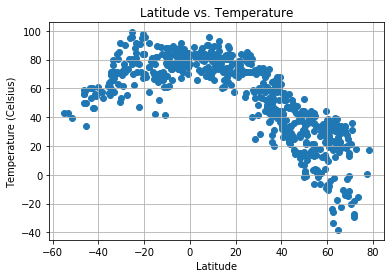

In [11]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

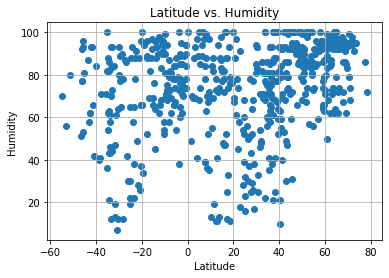

In [12]:

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

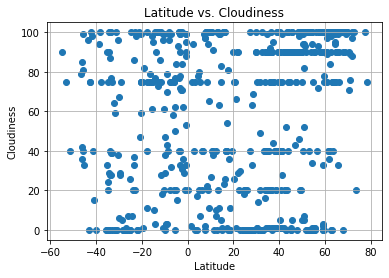

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

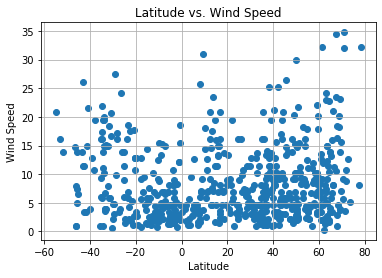

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevWindSpeed.png")

# Show plot
plt.show()

# Observations

##1.There is a correlation between latitude and temperature, cities closest to the equator had highest tempratures
##2.There is no correlation between wind speed and temperature
##3. Although there was a correlation between temp. and lat. there was no effect on humidity and cloudiness